In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from sklearn import datasets
from scipy import stats
import calendar

In [5]:
path = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_190706.txt"
new_cols = ["C/A", "UNIT", "SCP", "STATION", "LINENAME", "DIVISION", "DATE", "TIME", "DESC", "ENTRIES", "EXITS"]
MTA_turnstile_sample_data_190706 = pd.read_csv(path, sep=",", header=0, names=new_cols)

In [7]:
MTA_turnstile_sample_data_190706 = MTA_turnstile_sample_data_190706.dropna()

In [8]:
### re-format columns types
MTA_turnstile_sample_data_190706["TIME"] = (pd.to_datetime(MTA_turnstile_sample_data_190706["TIME"])).dt.time
MTA_turnstile_sample_data_190706["DAY_OF_WEEK"] = (pd.to_datetime(MTA_turnstile_sample_data_190706["DATE"])).dt.weekday_name # by day of the week
MTA_turnstile_sample_data_190706["MONTH"] = (pd.to_datetime(MTA_turnstile_sample_data_190706["DATE"])).dt.month # by month
MTA_turnstile_sample_data_190706['MONTH'] = MTA_turnstile_sample_data_190706['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [9]:
### total turnstile activity
MTA_turnstile_sample_data_190706["TURNSTILE_PASSES"] = (MTA_turnstile_sample_data_190706["ENTRIES"] + MTA_turnstile_sample_data_190706["EXITS"])/1000000

In [10]:
### highest traffic as of 07/06/2019 is 61 ST WOOLSIDE with 3968.28319 million
### TURNSTILE_PASSES is divided by one million for brevity
MTA_turnstile_sample_data_190706["TURNSTILE_PASSES"].max() 
max_turnstile_col = MTA_turnstile_sample_data_190706[MTA_turnstile_sample_data_190706["TURNSTILE_PASSES"] == MTA_turnstile_sample_data_190706["TURNSTILE_PASSES"].max()]
max_turnstile_col 


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DAY_OF_WEEK,MONTH,TURNSTILE_PASSES
190582,R523,R147,00-00-04,61 ST WOODSIDE,7,IRT,06/29/2019,01:00:00,REGULAR,1844320189,2123963001,Saturday,Jun,3968.28319


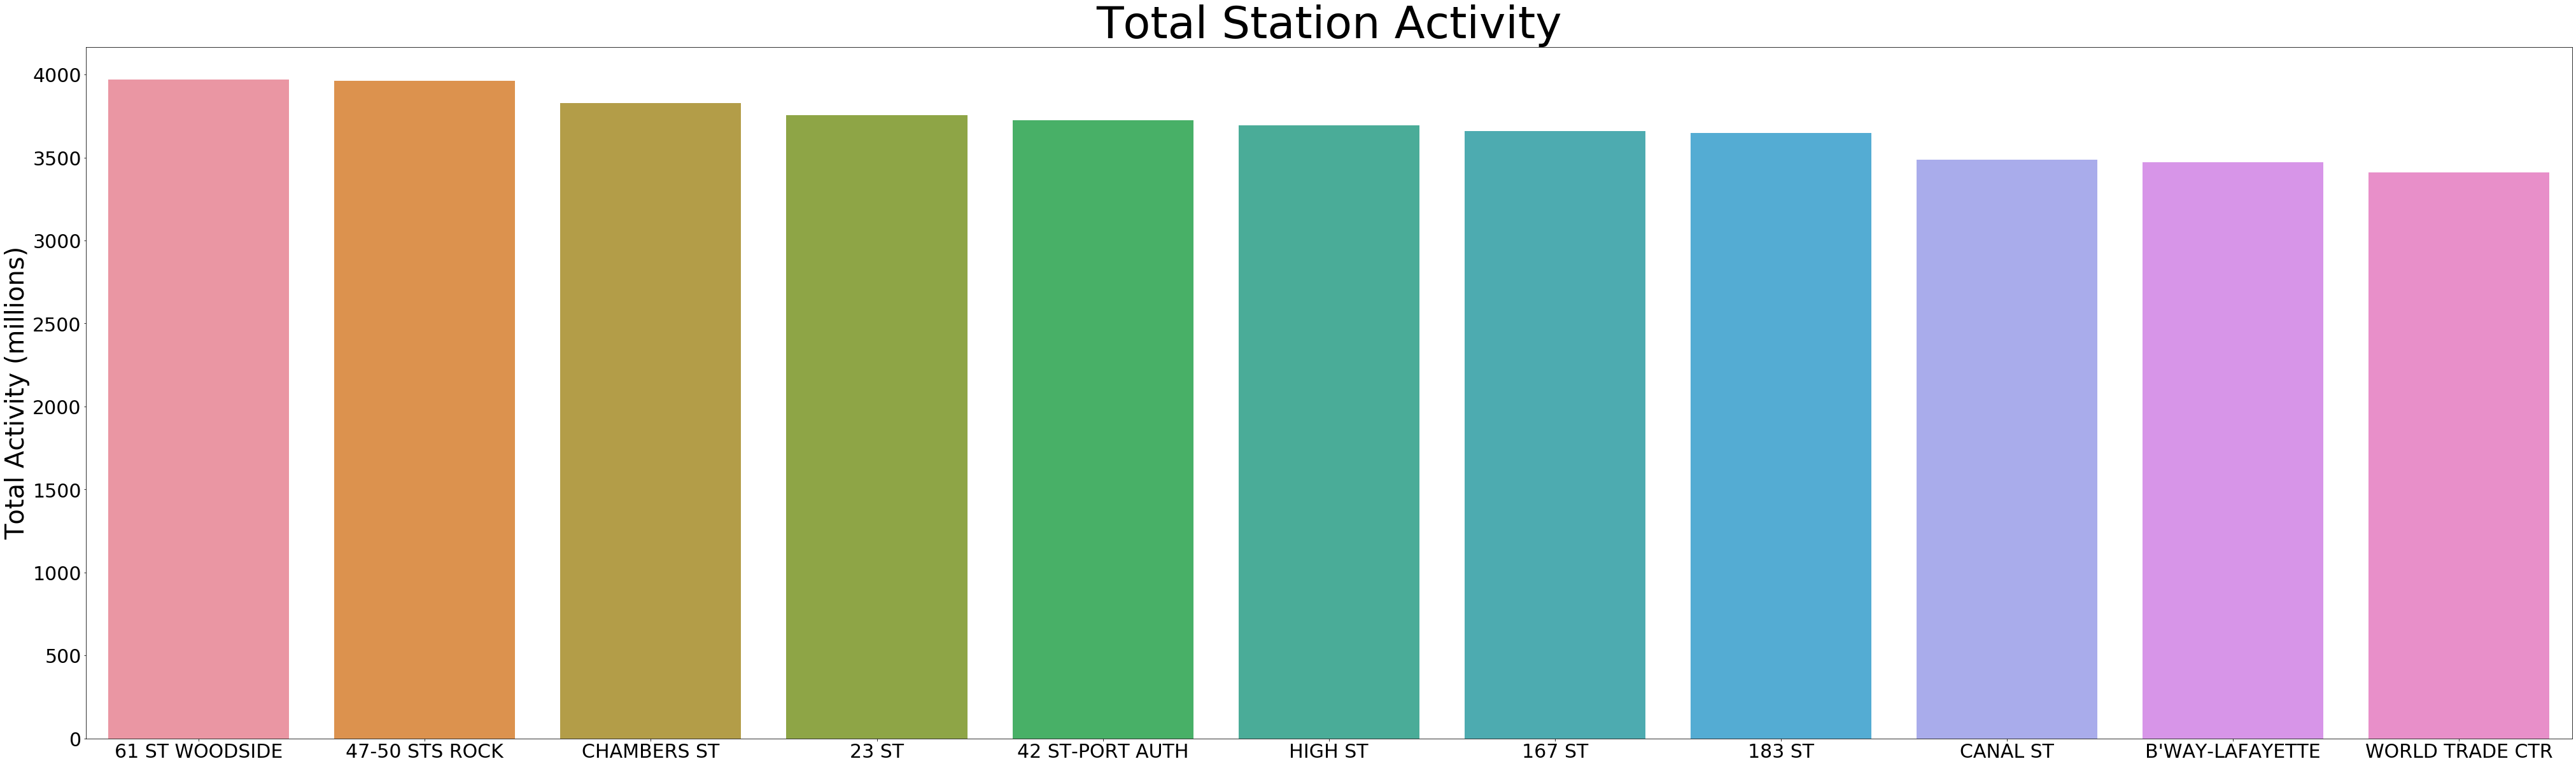

In [40]:
### top 10 stations with the most activity
station_activity = MTA_turnstile_sample_data_190706.groupby("STATION", as_index = False)[["TURNSTILE_PASSES"]].max()
station_activity = station_activity.sort_values("TURNSTILE_PASSES", ascending = False)
station_activity_condensed = station_activity.iloc[0:11]
plt.figure(figsize=(70, 20))
activity_plot = sns.barplot(x = "STATION", y = "TURNSTILE_PASSES", data = station_activity_condensed);
activity_plot.axes.set_title("Total Station Activity",fontsize=70)
activity_plot.set_xlabel(None);
activity_plot.set_ylabel("Total Activity (millions)",fontsize=40);
activity_plot.tick_params(labelsize=30)